In [84]:
from elasticsearch import Elasticsearch
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [85]:
# connection to the cluster
es = Elasticsearch(hosts="http://localhost:9200")
# index from which to retrieve data
index_name = ['jobs_stepstone', 'Welcome to the jungle']
# query
query = {
    "query": {
        "match_all": {}
    }
}
# perform search

result = es.search(index=index_name, body=query, size=10000)

# extract result

hits = result.get('hits', {}).get('hits', [])

# retrieve data

data = []

for hit in hits:
    source_data = hit.get('_source', {})
    data.append(source_data)

In [95]:
df.head()

,job_title,company,publish_date,location,contract_type,employment_status,work_mode,description_title,description,benefits,salary_min,salary_max,salary_avg,website,month,week
0,Product Manager Analytic Datasets,AVIV Group,2023-12-02,Berlin,Permanent contract,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Welcome to the jungle,12,48
1,(Senior) Data Engineer- MPD Team,AVIV Group,2023-12-02,Berlin,Permanent contract,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Welcome to the jungle,12,48
2,Senior Data Scientist - (m/w/d),Choco,2023-12-01,Berlin,Permanent contract,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Welcome to the jungle,12,48
3,Senior Analytics Engineer / Data Warehouse Arc...,Choco,2023-12-01,Berlin,Permanent contract,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Welcome to the jungle,12,48
4,Data Engineer (M/W/D),AVIV Group,2023-11-30,Berlin,Permanent contract,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Welcome to the jungle,11,48


In [ ]:
### Object to datatime, create new columns: week, month

In [27]:
df['publish_date'] = pd.to_datetime(df['publish_date'])
df['month'] = df['publish_date'].dt.month
df['week'] = df['publish_date'].dt.isocalendar().week

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3374 entries, 0 to 3373
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   job_title          3374 non-null   object        
 1   company            3374 non-null   object        
 2   publish_date       3374 non-null   datetime64[ns]
 3   location           3374 non-null   object        
 4   contract_type      3180 non-null   object        
 5   employment_status  3167 non-null   object        
 6   work_mode          1802 non-null   object        
 7   description_title  3321 non-null   object        
 8   description        3321 non-null   object        
 9   benefits           560 non-null    object        
 10  salary_min         2178 non-null   float64       
 11  salary_max         2178 non-null   float64       
 12  salary_avg         2178 non-null   float64       
 13  website            3374 non-null   object        
 14  month   

In [28]:
df.describe()

,publish_date,salary_min,salary_max,salary_avg,month,week
count,3374,2178.000000,2178.000000,2178.000000,3374.000000,3374.0
mean,2023-11-23 16:51:29.982216960,54164.528007,76960.495868,65562.511938,11.145525,47.137226
min,2023-10-10 00:00:00,1000.000000,1000.000000,2800.000000,10.000000,41.0
25%,2023-11-21 00:00:00,45000.000000,65000.000000,55000.000000,11.000000,47.0
50%,2023-11-24 00:00:00,52000.000000,76000.000000,64000.000000,11.000000,47.0
75%,2023-11-29 00:00:00,60000.000000,87000.000000,73500.000000,11.000000,48.0
max,2023-12-03 00:00:00,900000.000000,900000.000000,900000.000000,12.000000,48.0
std,NaN,32227.553187,25674.736726,25894.303520,0.365073,0.972413


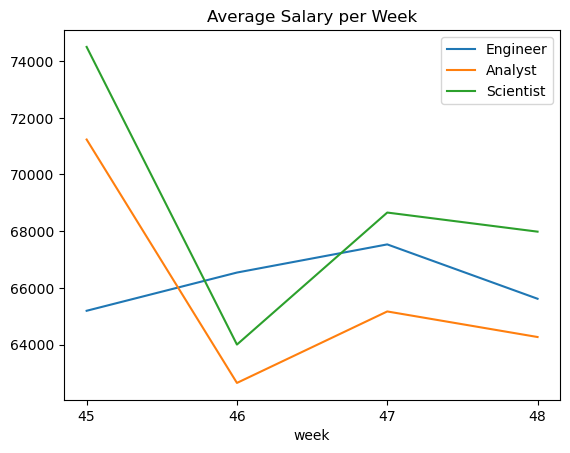

In [30]:
import matplotlib.ticker as ticker

# Filter the DataFrame to include only rows where 'job_title' contains 'engineer|engineering'
df_engineer = df[df['job_title'].str.contains('engineer|engineering', case=False, na=False)]

# Group by 'week' and calculate the average of 'salary_avg'
avg_salary_engineer = df_engineer.groupby('week')['salary_avg'].mean()

# Filter the DataFrame to include only rows where 'job_title' contains 'analyst|analytics'
df_analyst = df[df['job_title'].str.contains('analyst|analytics', case=False, na=False)]

# Group by 'week' and calculate the average of 'salary_avg'
avg_salary_analyst = df_analyst.groupby('week')['salary_avg'].mean()

# Filter the DataFrame to include only rows where 'job_title' contains 'scientist'
df_scientist = df[df['job_title'].str.contains('scientist', case=False, na=False)]

# Group by 'week' and calculate the average of 'salary_avg'
avg_salary_scientist = df_scientist.groupby('week')['salary_avg'].mean()

# Create a new figure and axes
fig, ax = plt.subplots()

# Plot the data
avg_salary_engineer.plot(kind='line', ax=ax, label='Engineer')
avg_salary_analyst.plot(kind='line', ax=ax, label='Analyst')
avg_salary_scientist.plot(kind='line', ax=ax, label='Scientist')

# Set the title
ax.set_title("Average Salary per Week")

# Set x-axis to display only integer values
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Show the legend
ax.legend()

# Show the plot
plt.show()

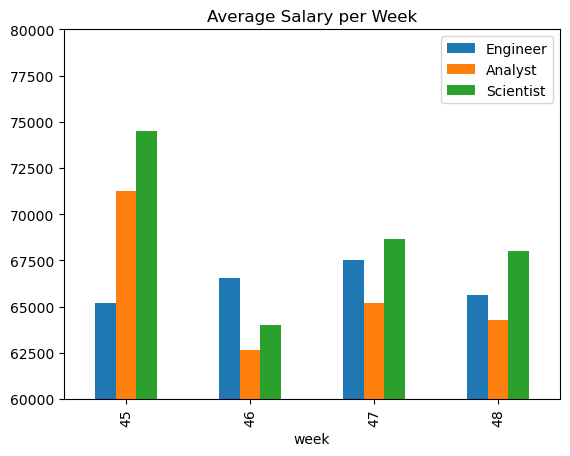

In [31]:
import matplotlib.ticker as ticker
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame to include only rows where 'job_title' contains 'engineer|engineering'
df_engineer = df[(df['job_title'].str.contains('engineer|engineering', case=False, na=False)) & 
                 (df['week'].between(45, 48)) & 
                 (df['salary_avg'])]

# Group by 'week' and calculate the average of 'salary_avg'
avg_salary_engineer = df_engineer.groupby('week')['salary_avg'].mean()

# Filter the DataFrame to include only rows where 'job_title' contains 'analyst|analytics'
df_analyst = df[(df['job_title'].str.contains('analyst|analytics', case=False, na=False)) & 
                (df['week'].between(45, 48)) & 
                (df['salary_avg'])]

# Group by 'week' and calculate the average of 'salary_avg'
avg_salary_analyst = df_analyst.groupby('week')['salary_avg'].mean()

# Filter the DataFrame to include only rows where 'job_title' contains 'scientist'
df_scientist = df[(df['job_title'].str.contains('scientist', case=False, na=False)) & 
                  (df['week'].between(45, 48)) & 
                  (df['salary_avg'])]

# Group by 'week' and calculate the average of 'salary_avg'
avg_salary_scientist = df_scientist.groupby('week')['salary_avg'].mean()

# Create a new DataFrame for the bar chart
df_bar = pd.DataFrame({
    'Engineer': avg_salary_engineer,
    'Analyst': avg_salary_analyst,
    'Scientist': avg_salary_scientist
})

# Create a new figure and axes
fig, ax = plt.subplots()

# Plot the data
df_bar.plot(kind='bar', ax=ax)

# Set the title
ax.set_title("Average Salary per Week")

# Set x-axis to display only integer values
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Set y-axis limits
ax.set_ylim(60000, 80000)

# Show the legend
ax.legend()

# Show the plot
plt.show()



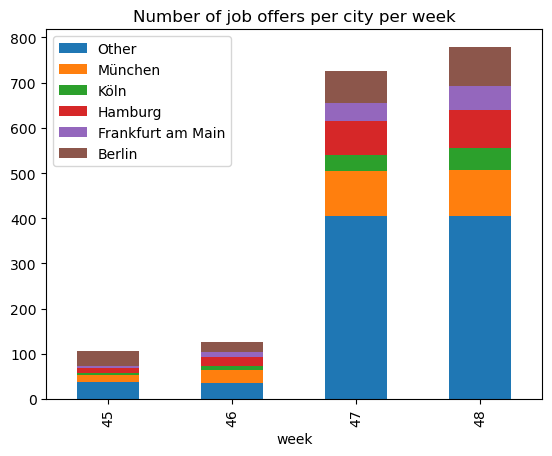

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'publish_date' to datetime format
df['publish_date'] = pd.to_datetime(df['publish_date'])

# Extract the week from 'publish_date' and create a new 'week' column
df['week'] = df['publish_date'].dt.isocalendar().week

# Group by 'week' and 'location', and count the number of 'job_title'
df_grouped = df.groupby(['week', 'location'])['job_title'].count().reset_index()

# Filter the DataFrame to include only rows where the count of 'job_title' is at least 5
df_filtered = df_grouped[df_grouped['job_title'] >= 5]

# Get the top 5 cities with the most number of job titles
top_cities = df_filtered.groupby('location')['job_title'].sum().nlargest(5).index

# Create a new DataFrame for the rest of the cities
df_rest = df_filtered[~df_filtered['location'].isin(top_cities)]
df_rest_grouped = df_rest.groupby('week')['job_title'].sum().reset_index()
df_rest_grouped['location'] = 'Other'

# Combine the top 5 cities and the rest of the cities
df_combined = pd.concat([df_filtered[df_filtered['location'].isin(top_cities)], df_rest_grouped])

# Unstack the DataFrame to prepare for the stacked bar chart
df_unstacked = df_combined.set_index(['week', 'location']).unstack('location')

# Sort the DataFrame in descending order by location
df_unstacked = df_unstacked.sort_values(by='location', axis=1, ascending=False)

# Create a stacked bar chart with the number of 'job_title' per 'location' per 'week'
df_unstacked.plot(kind='bar', stacked=True)

# Modify the legend labels to display only the city names
plt.legend([label[1] for label in df_unstacked.columns])

plt.title('Number of job offers per city per week')
# Show the plot
plt.show() 

In [97]:
import pandas as pd
import plotly.graph_objects as go

# Convert 'week' to integer
df['week'] = df['week'].astype(int)

# Get the top 5 most frequent locations
top_locations = df['location'].value_counts().nlargest(5).index

# Add an 'All' option to the locations
locations = list(top_locations) + ['Rest']

# Create a figure
fig = go.Figure()

# Add traces for each location
for location in locations:
    if location == 'Rest':
        df_filtered = df
    else:
        df_filtered = df[df['location'] == location]
    
    # Filter the DataFrame based on job title, week, and salary_avg
    df_filtered = df_filtered[(df_filtered['job_title'].str.contains('engineer|engineering', case=False, na=False)) & 
                               (df_filtered['week'].between(45, 48)) & 
                               (df_filtered['salary_avg'].notnull())]
    
    # Group by 'week' and calculate the average of 'salary_avg'
    avg_salary = df_filtered.groupby('week')['salary_avg'].mean()

    # Convert 'week' back to integer
    avg_salary.index = avg_salary.index.astype(int)

    # Add a bar for the location
    fig.add_trace(go.Bar(x=avg_salary.index, y=avg_salary.values, name=location))

# Add a dropdown menu and title to the figure
fig.update_layout(
    title='Salary for Data Engineer',
    title_x=0.5,  # This centers the title
    updatemenus=[
        go.layout.Updatemenu(
            buttons=list([
                dict(
                    args=[{"visible": [location == loc for loc in locations]}],
                    label=location,
                    method="update"
                ) for location in locations
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Show the plot
fig.show()

In [92]:
import pandas as pd
import plotly.graph_objects as go

# Convert 'week' to integer
df['week'] = df['week'].astype(int)

# Get the top 5 most frequent locations
top_locations = df['location'].value_counts().nlargest(5).index

# Add an 'All' option to the locations
locations = list(top_locations) + ['Rest']

# Create a figure
fig = go.Figure()

# Add traces for each location
for location in locations:
    if location == 'Rest':
        df_filtered = df
    else:
        df_filtered = df[df['location'] == location]
    
    # Filter the DataFrame based on job title, week, and salary_avg
    df_filtered = df_filtered[(df_filtered['job_title'].str.contains('analyst|analytics', case=False, na=False)) & 
                               (df_filtered['week'].between(45, 48)) & 
                               (df_filtered['salary_avg'].notnull())]
    
    # Group by 'week' and calculate the average of 'salary_avg'
    avg_salary = df_filtered.groupby('week')['salary_avg'].mean()

    # Convert 'week' back to integer
    avg_salary.index = avg_salary.index.astype(int)

    # Add a bar for the location
    fig.add_trace(go.Bar(x=avg_salary.index, y=avg_salary.values, name=location))

# Add a dropdown menu and title to the figure
fig.update_layout(
    title='Salary for Data Analyst',
    title_x=0.5,  # This centers the title
    updatemenus=[
        go.layout.Updatemenu(
            buttons=list([
                dict(
                    args=[{"visible": [location == loc for loc in locations]}],
                    label=location,
                    method="update"
                ) for location in locations
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Show the plot
fig.show()

In [93]:
import pandas as pd
import plotly.graph_objects as go

# Convert 'week' to integer
df['week'] = df['week'].astype(int)

# Get the top 5 most frequent locations
top_locations = df['location'].value_counts().nlargest(5).index

# Add an 'All' option to the locations
locations = list(top_locations) + ['Rest']

# Create a figure
fig = go.Figure()

# Add traces for each location
for location in locations:
    if location == 'Rest':
        df_filtered = df
    else:
        df_filtered = df[df['location'] == location]
    
    # Filter the DataFrame based on job title, week, and salary_avg
    df_filtered = df_filtered[(df_filtered['job_title'].str.contains('scientist|science', case=False, na=False)) & 
                               (df_filtered['week'].between(45, 48)) & 
                               (df_filtered['salary_avg'].notnull())]
    
    # Group by 'week' and calculate the average of 'salary_avg'
    avg_salary = df_filtered.groupby('week')['salary_avg'].mean()

    # Convert 'week' back to integer
    avg_salary.index = avg_salary.index.astype(int)

    # Add a bar for the location
    fig.add_trace(go.Bar(x=avg_salary.index, y=avg_salary.values, name=location))

# Add a dropdown menu and title to the figure
fig.update_layout(
    title='Salary for Data Scientist',
    title_x=0.5,  # This centers the title
    updatemenus=[
        go.layout.Updatemenu(
            buttons=list([
                dict(
                    args=[{"visible": [location == loc for loc in locations]}],
                    label=location,
                    method="update"
                ) for location in locations
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Show the plot
fig.show()